<H1>Processing of Both Files
<h6> takes up data from both files, prints and plot them over each other
<h6> in the next part of the code, it takes up data from cantera and alborz (input manually) and plot them
<h6> the same is for maxmum temperature<br>
<h6> and gives the temperature difference

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the paths to your data files and temperature labels

#temp_labels = ['1000', '1200', '1400', '1600']  use this for multiple rounds of  results
temp_labels = ['1400']
data_paths_cantera = ['Results/CANTERA_H2_species_molar_fractions' + Temp + '.csv' for Temp in temp_labels]
data_paths_alborz = ['D:/2_Cantera/Python_files/0D_H2/Alborz_Results/Alborz_Results_H2_'+Temp+'/debug/species_mole_fractions.dat' for Temp in temp_labels]

for i, (data_path_cantera, data_path_alborz, Temp) in enumerate(zip(data_paths_cantera, data_paths_alborz, temp_labels)):
    # Load data for Cantera
    data_cantera = np.loadtxt(data_path_cantera, delimiter=',', skiprows=1)
    time_cantera = data_cantera[:, 1]
    temp_cantera = data_cantera[:, 2]
    species_data_cantera = data_cantera[:, 3:]

    # Load data for Alborz
    data_alborz = np.loadtxt(data_path_alborz)
    time_alborz = data_alborz[:, 1]
    temp_alborz = data_alborz[:, 2]
    species_data_alborz = data_alborz[:, 3:]

    min_temp_cantera = min(temp_cantera)
    min_temp_alborz = min(temp_alborz)
    max_temp_cantera = max(temp_cantera)
    max_temp_alborz = max(temp_alborz)

    # Extract species names dynamically
    num_species = species_data_cantera.shape[1]
    species_names = ['H2', 'H', 'O2', 'OH', 'O', 'H2O', 'HO2', 'H2O2', 'N2']

    # Extract the final values of species mole fractions
    final_species_cantera = species_data_cantera[-1, :]
    final_species_alborz = species_data_alborz[-1, :]

    print(f"Temperature: {Temp}K")
    print(f"The min temperature is: Cantera:{min_temp_cantera}K; Alborz:{min_temp_alborz:.2e}K")
    print(f"The maximum temperature is: Cantera:{max_temp_cantera:.3f}K; Alborz:{max_temp_alborz:.3f}K")

    # Print the final values for each species
    for species_name, cantera_value, alborz_value in zip(species_names, final_species_cantera, final_species_alborz):
        print(f"{species_name}: Cantera:{cantera_value:.2e}; Alborz:{alborz_value:.2e}")

    # Calculate heat release at each time step for Alborz
    heat_release = np.diff(data_alborz[:, 2]) / np.diff(data_alborz[:, 1])

    # Find the index of maximum heat release
    max_heat_release_idx = np.argmax(heat_release)
    max_heat_release_time = data_alborz[:, 1][max_heat_release_idx]

    # Print the results
    print(f"Physical time at maximum heat release: {max_heat_release_time} seconds")

    print('\n')

Temperature: 1400K
The min temperature is: Cantera:1399.9997224937208K; Alborz:1.40e+03K
The maximum temperature is: Cantera:2561.876K; Alborz:2569.643K
H2: Cantera:1.50e-02; Alborz:1.44e-02
H: Cantera:3.46e-03; Alborz:3.25e-03
O2: Cantera:1.34e-01; Alborz:1.34e-01
OH: Cantera:4.44e-02; Alborz:4.38e-02
O: Cantera:6.15e-03; Alborz:5.90e-03
H2O: Cantera:7.97e-01; Alborz:7.99e-01
HO2: Cantera:1.55e-05; Alborz:1.49e-05
H2O2: Cantera:1.03e-09; Alborz:9.37e-10
N2: Cantera:0.00e+00; Alborz:0.00e+00
Physical time at maximum heat release: 1.4985999999997847e-05 seconds




Combined Plots!

['Temperature (K)', 'H2', 'H', 'O2', 'OH', 'O', 'H2O', 'HO2', 'H2O2', 'N2']


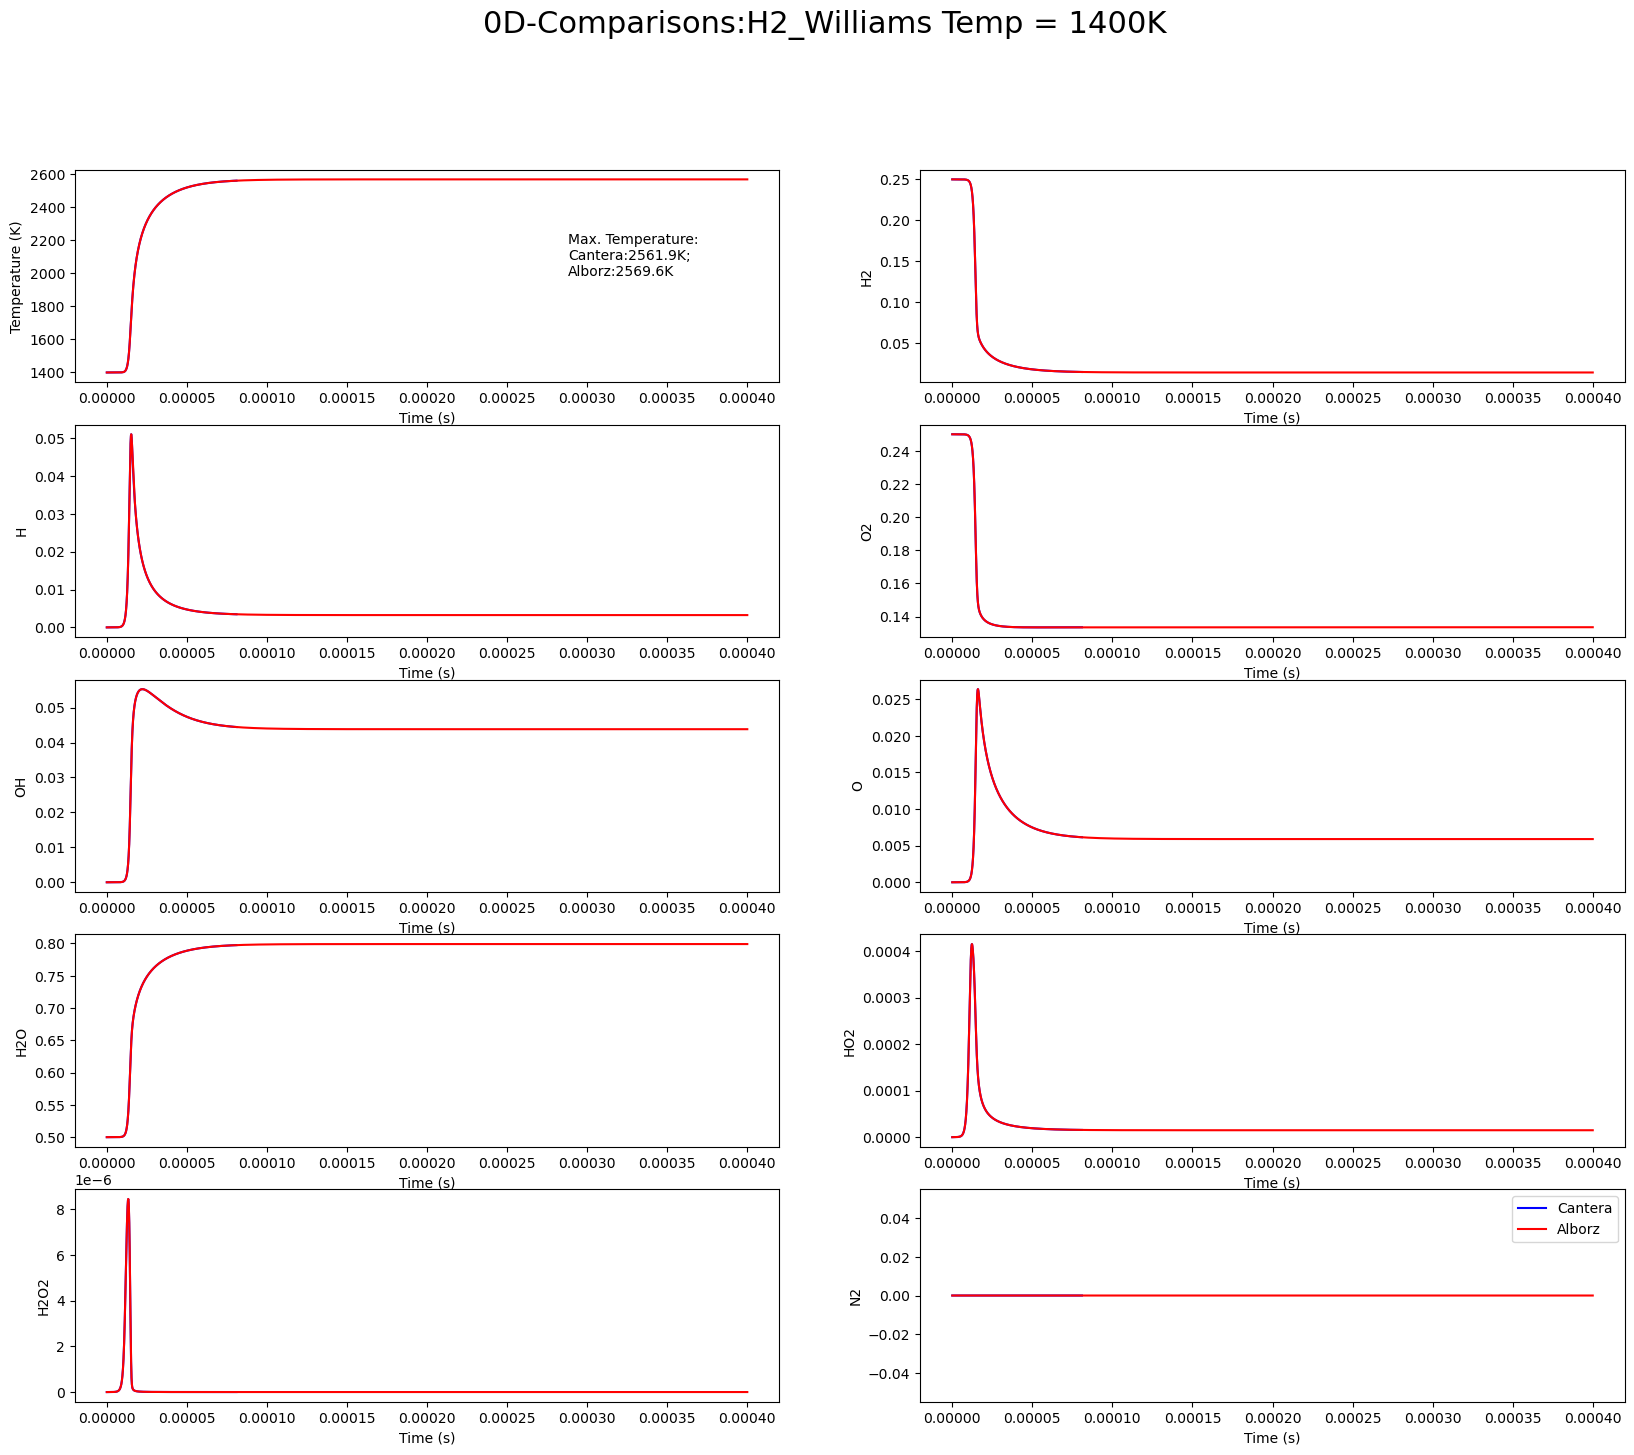

In [11]:
#ALBORZ_DATA
#   columns         0           1       2          3    4       5   6       7   8
# species_order = [Iteration, Time, Temperature, 'O2', 'H2O','CH4','CO', 'CO2', 'N2']

#Cantera_Data
#   columns         0          1           2      3/0  4/1   5/2  6/3  7/4 8/5
# species_order = Iteration,Time (s),Temperature, O2,  H2O,  CH4, CO,  CO2,  N2

# Define your list of species
things_to_plot = ['Temperature (K)']+species_names
print(things_to_plot)

for i, (data_path_cantera, data_path_alborz, Temp) in enumerate(zip(data_paths_cantera, data_paths_alborz, temp_labels)):

    # Create subplots for temperature and species mole fractions
    num_to_plot = len(things_to_plot)
    num_rows = int(np.ceil(num_to_plot / 2))
    num_cols = min(2, num_to_plot)

    fig_total = plt.figure(figsize=(20, 16))
    plt.clf()

    ax1 = plt.subplot(num_rows, num_cols, 1)
    plt.plot(time_cantera, temp_cantera, 'b-')
    plt.plot(time_alborz, temp_alborz, 'r-')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (K)')
    text = f'Max. Temperature:\nCantera:{max_temp_cantera:.1f}K;\nAlborz:{max_temp_alborz:.1f}K'
    plt.text(0.7, 0.5, text, transform=ax1.transAxes)

    for j, species_name in enumerate(things_to_plot[1:]):  # Skip the first element (temperature)
        plt.subplot(num_rows, num_cols, j + 2)  # j + 2 to account for the temperature subplot
        plt.plot(time_cantera, species_data_cantera[:, j], 'b-')
        plt.plot(time_alborz, species_data_alborz[:, j], 'r-')
        plt.xlabel('Time (s)')
        plt.ylabel(species_name)

    plt.legend(loc='upper right', labels=['Cantera','Alborz'])
    # Save or display the entire Figure
    fig_total.suptitle(f'0D-Comparisons:H2_Williams Temp = {Temp}K', fontsize=22)
    #plt.tight_layout()
    plt.savefig(f'Results/0D-H2 Comparison_{Temp}.png', dpi=300)
    plt.show()


Autoignition_combined

In [50]:
#Feed the data
#1200: The maximum temperature is: Cantera:2477.544K; Alborz:2481.256K
#Physical time at maximum heat release: 5.3325999999978096e-05 seconds

#1400: The maximum temperature is: Cantera:2561.876K; Alborz:2569.643K
#Physical time at maximum heat release: 1.4985999999997847e-05 seconds

#1600 The maximum temperature is: Cantera:2646.746K; Alborz:2646.645K
#Physical time at maximum heat release: 7.88800000000032e-06 seconds

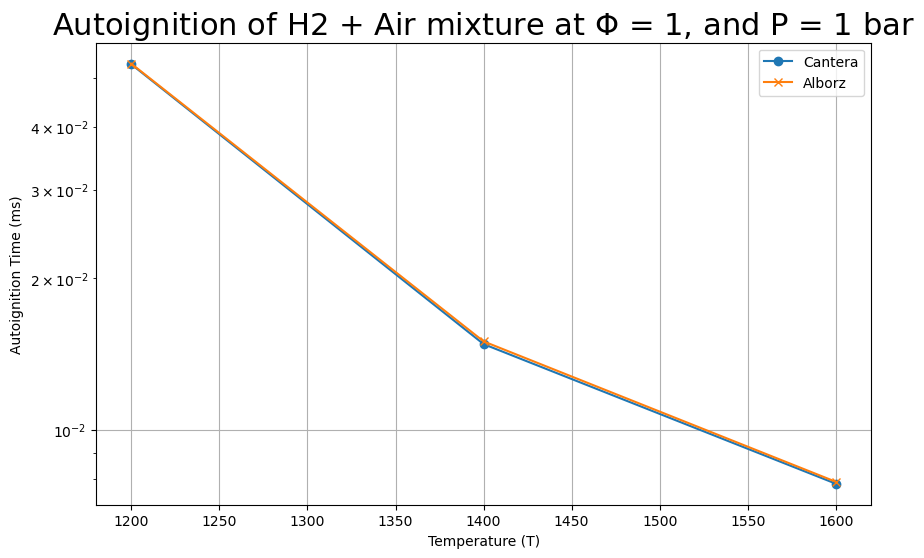

In [13]:
# Given data for the first table
#For T = 1600.0, Autoignition time = 7.819999999999945e-06 s
# For T = 1400.0, Autoignition time = 1.4801999999997911e-05 s
#For T = 1200.0, Autoignition time = 5.318199999997827e-05 s

#CANTERA
data_cantera = {
    1200: 5.318199999997827e-05,
    1400: 1.4801999999997911e-05,
    1600: 7.819999999999945e-06
}

#ALBORZ
#1600: Physical time at maximum heat release: 7.88800000000032e-06 seconds
#1400: Physical time at maximum heat release: 1.4985999999997847e-05 seconds
#1200: Physical time at maximum heat release: 5.3325999999978096e-05 seconds

data_alborz = {
    1200: 5.3325999999978096e-05,
    1400: 1.4985999999997847e-05,
    1600: 7.88800000000032e-06
}

# Extract temperatures and autoignition times from the dictionaries
temperatures = list(data_cantera.keys())
autoignition_times_1 = [time * 1000 for time in data_cantera.values()]# Convert to milliseconds
autoignition_times_2 = [time * 1000 for time in data_alborz.values()]  # Convert to milliseconds
plt.figure(figsize=(10, 6))
plt.plot(temperatures, autoignition_times_1, marker='o', label='Table 1')
plt.plot(temperatures, autoignition_times_2, marker='x', label='Table 2')
plt.xlabel('Temperature (T)')
plt.ylabel('Autoignition Time (ms)')
plt.yscale('log')
plt.title(r'Autoignition of H2 + Air mixture at $\Phi$ = 1, and P = 1 bar',
fontsize=22, horizontalalignment='center')
plt.axis()
plt.grid()
plt.legend(loc='upper right', labels=['Cantera','Alborz'])
plt.savefig('Results/0D-H2_Autoignition.png', dpi=300)
plt.show()

Maximum Temperature_combined

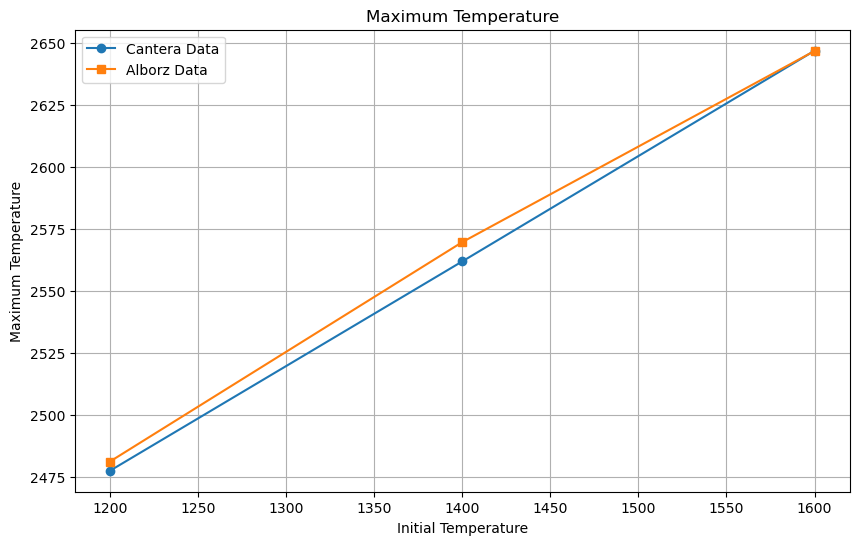

In [17]:
#1200: The maximum temperature is: Cantera:2477.544K; Alborz:2481.256K
#1400: The maximum temperature is: Cantera:2561.876K; Alborz:2569.643K
#1600 The maximum temperature is: Cantera:2646.746K; Alborz:2646.645K

# Simulated temperature data for Python and Alborz
np.random.seed(0)
num_simulations = 5

Cantera_Temperature = {
    1200: 2477.544,
    1400: 2561.876,
    1600: 2646.746
}

Alborz_Temperature = {
    1200: 2481.256,
    1400: 2569.643,
    1600: 2646.645
}

# Extract x (temperature) and y (value) data from dictionaries
x_python = list(Cantera_Temperature.keys())
y_cantera = list(Cantera_Temperature.values())

x_alborz = list(Alborz_Temperature.keys())
y_alborz = list(Alborz_Temperature.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_python, y_cantera, marker='o', label='Cantera Data')
plt.plot(x_alborz, y_alborz, marker='s', label='Alborz Data')
plt.xlabel('Initial Temperature')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature')
plt.legend()
plt.grid(True)
plt.savefig('Results/0D-H2_Max_Temperature.png', dpi=300)
plt.show()

#plt.text(0.5, 0.5, 'Center', transform = ax.transAxes)
#plt.text(0.05, 0.05, 'Bottom-left', transform = ax.transAxes)
#plt.text(0.8, 0.85, 'Top-right', transform = ax.transAxes)
#plt.text(0.8, 0.05, 'Bottom-right', transform = ax.transAxes)
#plt.text(0.05, 0.85, 'Top-left', transform = ax.transAxes)

Temperature Difference between Cantera and Alborz

[-3.711999999999989, -7.766999999999825, 0.10100000000011278]
[1200, 1400, 1600]


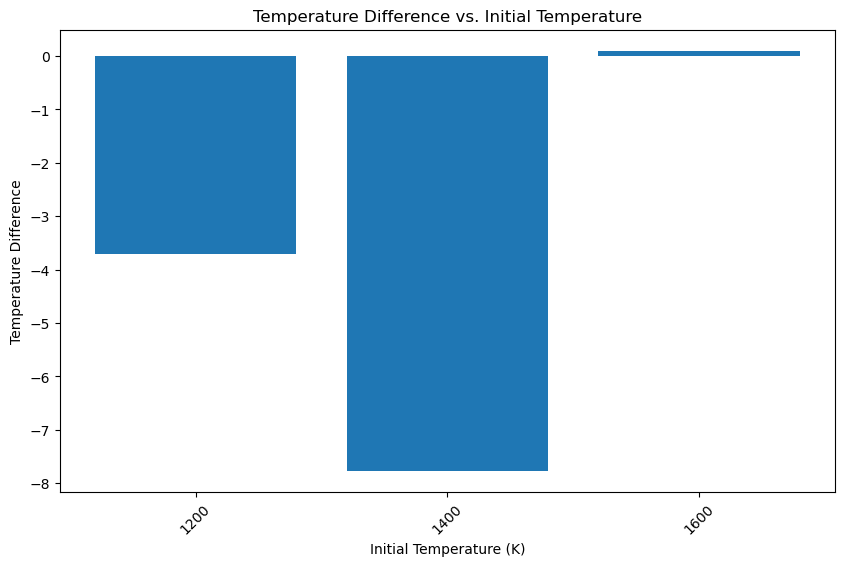

In [18]:
# Assuming y_cantera and y_alborz have the same length
y_diff = [y1 - y2 for y1, y2 in zip(y_cantera, y_alborz)]
print(y_diff)
print(x_python)

plt.figure(figsize=(10, 6))
plt.bar(range(len(x_python)), y_diff, tick_label=x_python)
plt.xlabel('Initial Temperature (K)')
plt.ylabel('Temperature Difference')
plt.title('Temperature Difference vs. Initial Temperature')
plt.xticks(rotation=45)
plt.grid(False)
plt.savefig('Results/0D-H2_Temp_Difference.png', dpi=300)
plt.show()